# Map Plot

### Change coordinates for Andh and Jhodia (Metadata is erronious) and then load from output
Edit locations in the CSV file for Jhodia (4101) = Same lat as any other Odisha and Andh (3762) = 19.7515 75.7139

In [114]:
import pandas as pd
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import scipy
import numpy as np
import cartopy.feature as cfeature
from random import random

%matplotlib inline

In [115]:
#read from csv
all_india_full = pd.read_csv('./data/all_india_full.csv')

dropped = []
for i in range(37):
    dropped.append("cv_"+str(i+1))
dropped_2 = ["canto_coding_id"]
for item in dropped_2:
    dropped.append(item) 
places = all_india_full.drop(columns=dropped)
places['count'] = places.groupby('culture')['culture'].transform('count')

exist = []
lat = []
lng = []
count = []
language = []
region = []
locations = pd.DataFrame()
for i, row in places.iterrows():
    if row["culture"] not in exist:
        exist.append(row["culture"])
        language.append(row['language'])
        lat.append(row["lat"])
        lng.append(row["lng"])
        count.append(300*row["count"])
        region.append(row["region"])
    else:
        pass
locations["culture"] = exist
locations["lat"] = lat
locations["lng"] = lng
locations["language"] = language
locations["count"] = count
locations["region"] = region

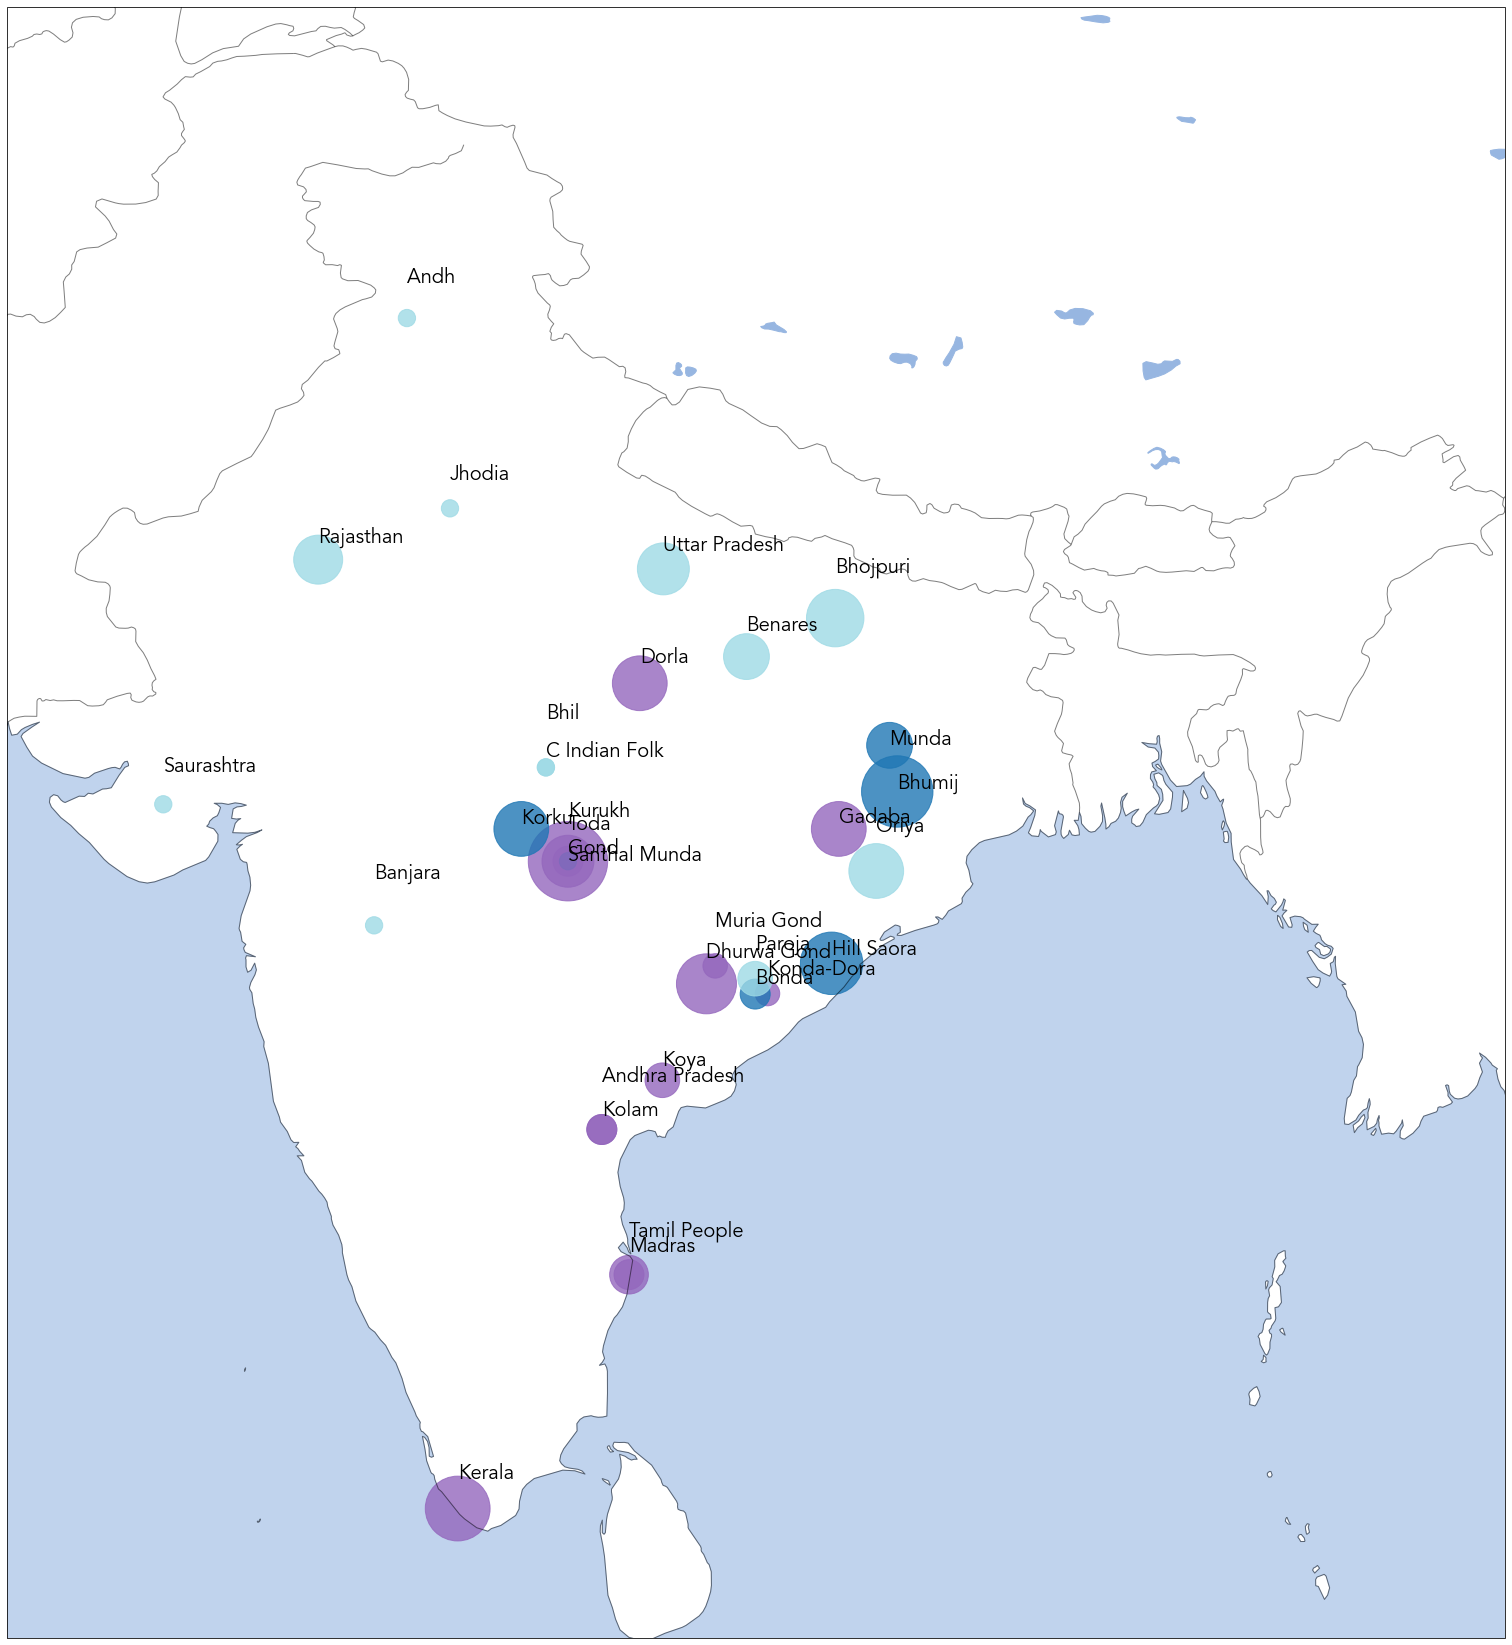

In [116]:
split_index = 14
categories = np.unique(locations['language'])
colors = np.linspace(0, 1, len(categories))
colordict = dict(zip(categories, colors))
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'font.family': 'Avenir'})
plt.rcParams.update({'axes.titlepad': 36.0})
locations["Color"] = locations['language'].apply(lambda x: colordict[x])
for i, row in locations.iterrows():
    if row['Color']==0.5:
        locations.loc[i, ['Color']] = .4
fig = plt.figure(figsize=(30,30))
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
ax.set_extent([68.14712,97.34466, 6, 37.090000])
north = locations.iloc[:split_index]
south = locations.iloc[split_index:]

north_label = "North India: "
south_label = "South India:\n"
for i, text in enumerate(north["culture"]):
    if i % 6 ==0:
        north_label+= "\n"+text
    else:    
        north_label+=", "+text
for i, text in enumerate(south["culture"]):
    if i==0:
        south_label+=text
    elif i%6==0:
        south_label+="\n"+text
    else:
        south_label+=", "+text
        
ax.scatter(locations.lng, 
           locations.lat, 
           c=locations['Color'], 
           cmap='tab20', 
           s=locations["count"], alpha=.8)
# ax.scatter(south.lng, south.lat, c="b", label=south_label, s=south["count"], alpha=.5)

for i, location in enumerate(locations['culture']):
    ax.annotate(location, (locations.loc[i, 'lng'],locations.loc[i, 'lat']+(random()*1)), fontsize=20)


# for i in range(2):
#     lgnd.legendHandles[i]._sizes = [500]
# for txt in lgnd.get_texts():
#     txt.set_va("bottom")
ax.coastlines(alpha=.5)
ax.add_feature(cfeature.BORDERS, alpha=.5)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.OCEAN, alpha=.6)
plt.savefig('./figs/map.png')

In [113]:
print("Total number of cultures is ", places['culture'].nunique())

Total number of cultures is  33


In [103]:
locations

,culture,lat,lng,language,count,region
0,Dhurwa Gond,18.75,81.78,Dravidian,12,North
1,Dorla,24.61,80.48,Dravidian,10,North
2,Muria Gond,19.10,81.95,Dravidian,2,North
3,Gond,21.14,79.08,Dravidian,21,North
4,C Indian Folk,22.97,78.65,Indo-European,1,North
5,Korku,21.77,78.17,Austroasiatic,10,North
6,Bhumij,22.50,85.50,Austroasiatic,17,North
7,Kurukh,21.14,79.08,Dravidian,3,North
8,Munda,23.40,85.35,Austroasiatic,7,North
9,Santhal Munda,21.14,79.08,Austroasiatic,1,North


array([0.5 , 0.75, 0.  ])

# World Map Plot

In [12]:
metadata = pd.read_csv('./data/metadata.csv')

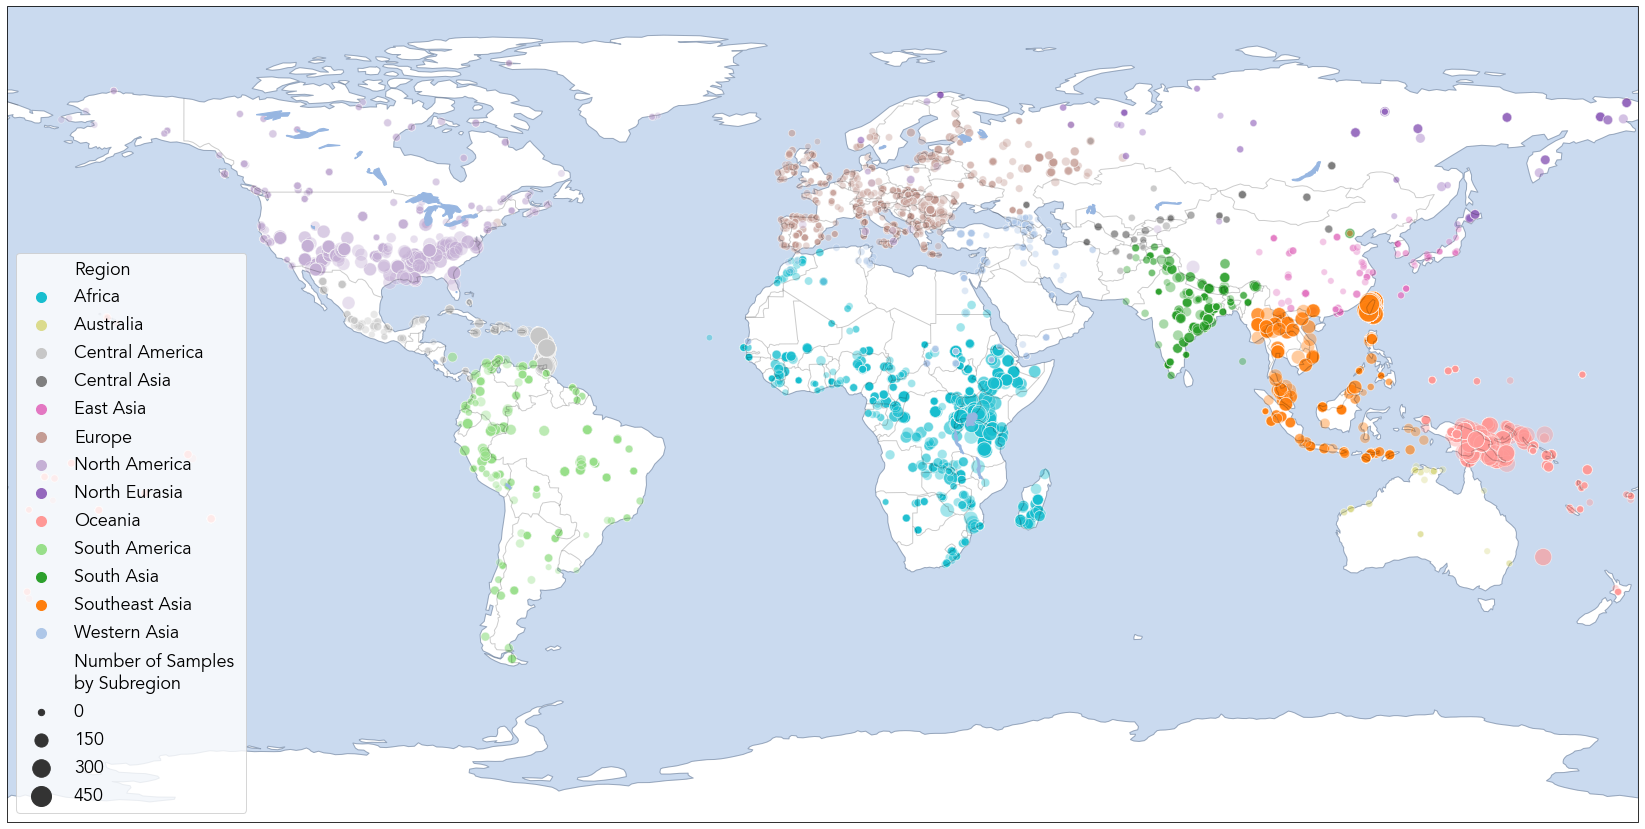

In [13]:
import seaborn as sns
fig = plt.figure(figsize=(30,15))


x = []
y = []
for i, row in metadata['Local_long'].iteritems():
    x.append(float(row))
    
for i, row in metadata['Local_lat'].iteritems():
    try:
        if row =='19,27':
            y.append(19.27)
        elif row == ' ':
            y.append(40.7410861)
        else:
            y.append(float(row))
    except ValueError as e:
        print(i, e)

plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'font.family': 'Avenir'})
plt.rcParams.update({'axes.titlepad': 36.0})

ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
ax.set_global()

# grouped_df = metadata.drop_duplicates(subset = ["Region"])
# grouped_df['count'] = 5*metadata.groupby('Region')['C-id'].transform('count')
# grouped_df.to_csv('./data/grouped.csv')
# grouped_df = pd.read_csv('./data/grouped.csv')
# groups = grouped_df.groupby('Region')

# for name, group in groups:
#     ax.scatter(group['Local_long'], group['Local_lat'], s=group['count'], alpha=.5, label=name)
#     for i,txt in enumerate(group['count']):
#         ax.annotate(str(int(txt/5)), (group['Local_long'].item(), group['Local_lat'].item()+3))


metadata['Number of Samples \nby Subregion'] = metadata.groupby('Subregion')['C-id'].transform('count')
# cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)

g = sns.scatterplot(x, y, palette=sns.color_palette("tab20_r", n_colors=13), hue=metadata['Region'], alpha=.4, size=metadata['Number of Samples \nby Subregion'], sizes=(40, 400))
lgnd = ax.legend(loc="lower left", markerscale=1.0)
for i in range(14):
    lgnd.legendHandles[i]._sizes = [100]

ax.coastlines(alpha=.2)
ax.add_feature(cfeature.BORDERS, alpha=.2)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.OCEAN, alpha=.5)


# plt.title("Cantometrics Recordings Global Sample", fontsize=50)
plt.savefig("./figs/world.png")